[1]:http://www.quotedb.com/quotes/2112

In [2]:
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
install.packages("stablelearner", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpAHSqAh\downloaded_packages
package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpAHSqAh\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpAHSqAh\downloaded_packages
package 'stablelearner' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aon91\AppData\Local\Temp\RtmpAHSqAh\downloaded_packages


Warning message:
"package 'vcd' was built under R version 3.6.2"Loading required package: grid
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Alle Aufgaben in Bezug mit Titanic wurden mit dem Datensatz des Packages `stablelearner` realisiert, da dieser auch nebem den Passagieren, auch die Crew-Mitglieder inkludiert. {% cite titanic_full_data %}

In [3]:
# Load dataset
# Full titanic dataset: https://rdrr.io/cran/stablelearner/man/titanic.html
# Includes crew, which is needed or the simpson paradoxon
data("titanic", package = "stablelearner")
ti <- titanic
ti$sex=ti$gender
# Add who colum
ti$who <- "NA"
ti$who[ti$sex=="male"] <- "man"
ti$who[ti$sex=="female"] <- "woman"
ti$who[ti$age<18] <- "child"
# Filter dataset
ti <- ti[!( ti$class=="" | ti$survived==""),]

### 1. Lade den Datensatz Titanic in R. Beschreibe die Daten anhand der internen Hilfe (hilfreiche R Befehle: ?, help() )
 

Mithilfe von `?` oder `help()` können Informationen zu einem Datensatz angezeigt werden. Dazu muss aber der Autor/Entwickler eine Dokumentation anfertigen, was bei meinem benutzen Datensatz nicht der Fall ist.

In [4]:
?ti
help(ti)

No documentation for 'ti' in specified packages and libraries:
you could try '??ti'

Mithilfe der `str` (structure) Funktion kann aber von jedem R Objekt die interne Datenstruktur kompakt angezeigt werden.

In [5]:
str(ti)

'data.frame':	2207 obs. of  13 variables:
 $ name    : chr  "Abbing, Mr. Anthony" "Abbott, Mr. Eugene Joseph" "Abbott, Mr. Rossmore Edward" "Abbott, Mrs. Rhoda Mary 'Rosa'" ...
 $ gender  : Factor w/ 2 levels "female","male": 2 2 2 1 1 2 2 1 2 2 ...
 $ age     : num  42 13 16 39 16 25 30 28 27 20 ...
 $ class   : Factor w/ 7 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 2 2 3 3 ...
 $ embarked: Factor w/ 4 levels "B","C","Q","S": 4 4 4 4 4 4 2 2 2 4 ...
 $ country : Factor w/ 48 levels "Argentina","Australia",..: 44 44 44 15 30 44 17 17 26 16 ...
 $ ticketno: int  5547 2673 2673 2673 348125 348122 3381 3381 2699 3101284 ...
 $ fare    : num  7.11 20.05 20.05 20.05 7.13 ...
 $ sibsp   : Ord.factor w/ 9 levels "0"<"1"<"2"<"3"<..: 1 1 2 2 1 1 2 2 1 1 ...
 $ parch   : Ord.factor w/ 10 levels "0"<"1"<"2"<"3"<..: 1 3 2 2 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 2 2 ...
 $ sex     : Factor w/ 2 levels "female","male": 2 2 2 1 1 2 2 1 2 2 ...
 $ who     : chr  "ma

### 2. Untersuche den Titanic Datensatz mithilfe von Tabellen von absoluten und relativen Häufigkeiten der Ränder heruntergebrochen auf je 2 oder 3 Dimensionen von Variablen. (hilfreiche R Befehle: table(), ftable(), colSums, rowSums(), apply(), xtable())

Anzahl der Überlebenden/Toten nach Alter:

In [6]:
table(ti$age, ti$survived)

              
               no yes
  0.1666666667  0   1
  0.3333333333  1   0
  0.4166666667  0   1
  0.5833333333  1   1
  0.75          0   2
  0.8333333333  0   3
  0.9166666667  0   1
  1             3   7
  2             8   5
  3             2   6
  4             3   9
  5             4   4
  6             2   2
  7             5   3
  8             5   5
  9             5   4
  10            7   0
  11            4   2
  12            1   2
  13            3   4
  14            5   3
  15            5   4
  16           11   9
  17           38   9
  18           39  22
  19           51  14
  20           57  16
  21           55  25
  22           66  33
  23           59  24
  24           54  33
  25           52  26
  26           52  17
  27           50  25
  28           60  22
  29           49  30
  30           62  28
  31           48  23
  32           45  28
  33           40  20
  34           33  12
  35           35  16
  36           46  21
  37           44

Anzahl der Überlebenden/Toten nach Passagier-Klasse bzw. Crew-Einteilung:

In [7]:
table(ti$class, ti$survived)

                  
                    no yes
  1st              123 201
  2nd              166 118
  3rd              528 181
  deck crew         23  43
  engineering crew 253  71
  restaurant staff  66   3
  victualling crew 337  94

Die Summe der Spalten/Zeilen ist bei diesem Datensatz nicht wirklich von großer Hilfe. Manche Werte sind falsch, weil sie nicht numerisch sind (Überlebensrate ist mit "yes"/"no" und nicht 1/0 definiert).

In [8]:
colSums(is.na(ti))
head(rowSums(is.na(ti)))

name   gender      age    class embarked  country ticketno     fare 
       0        0        2        0        0       81      891      916 
   sibsp    parch survived      sex      who 
     900      900        0        0        0

1 2 3 4 5 6 
0 0 0 0 0 0

### 3. Stelle die Daten in geeigneter Weise graphisch dar (hilfreiche R Befehle: barplot(), mosaicplot(), assocplot())

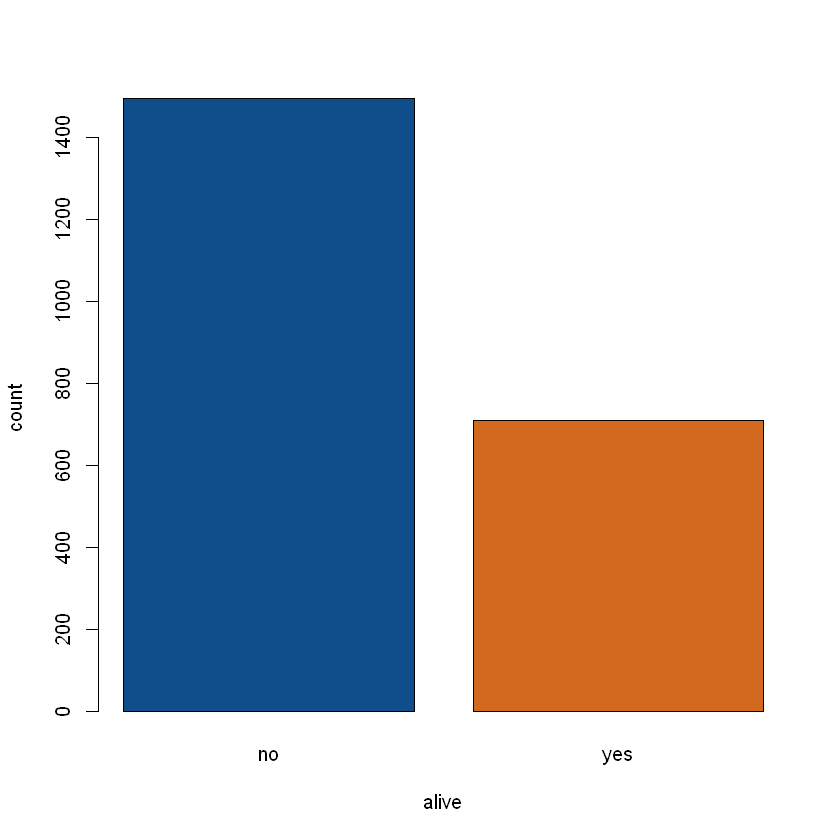

In [9]:
# Countplots in R: https://www.statmethods.net/graphs/bar.html
# Create counts from alive column
counts <- table(ti$survived)
barplot(counts, col=c("dodgerblue4", "chocolate"), xlab="alive", ylab="count")

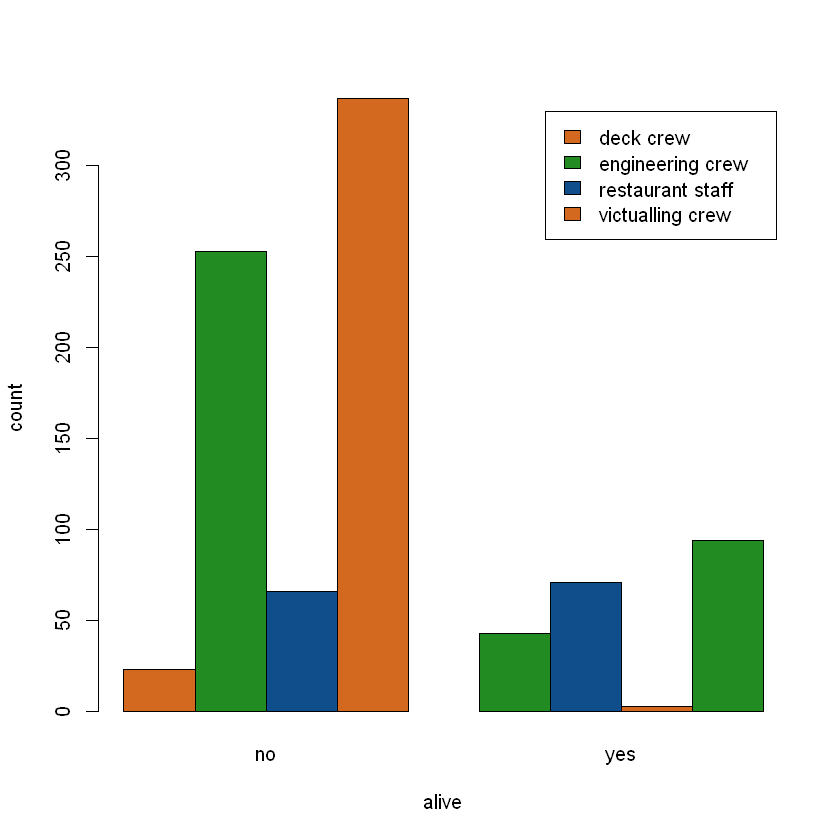

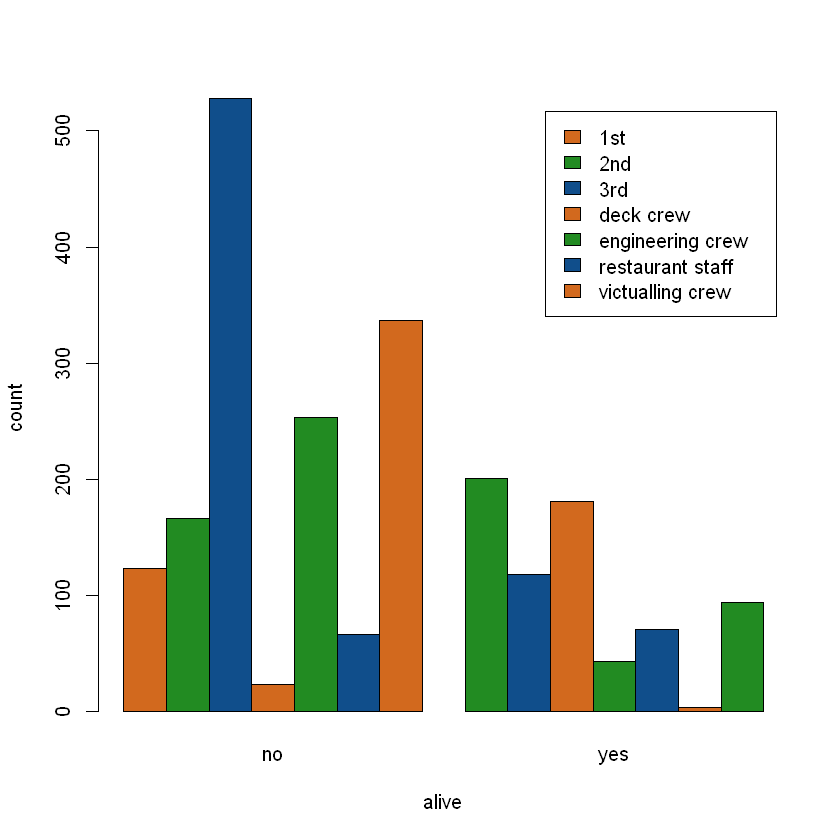

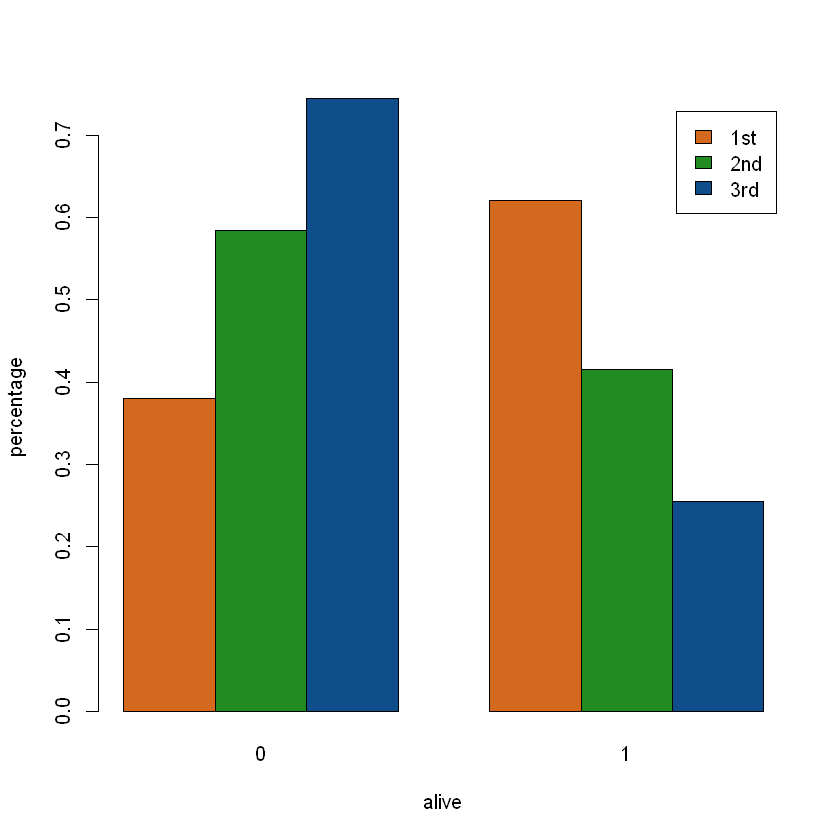

In [10]:
# Form a table with columns class and rows alive
counts <- table(ti$class[grepl("crew", ti$class) | grepl("staff", ti$class)],
                ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])
# Delete unused rows
# Source: https://stackoverflow.com/questions/37307307/remove-a-row-from-a-data-table-in-r
counts <- counts[-1:-3,]
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

counts <- table(ti$class, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
percentages <- matrix(c(
    length(ti$class[ti$class=="1st" & ti$survived=="no"]) / length(ti$class[ti$class=="1st"]),
    length(ti$class[ti$class=="2nd" & ti$survived=="no"]) / length(ti$class[ti$class=="2nd"]),
    length(ti$class[ti$class=="3rd" & ti$survived=="no"]) / length(ti$class[ti$class=="3rd"]),
    length(ti$class[ti$class=="1st" & ti$survived=="yes"]) / length(ti$class[ti$class=="1st"]),
    length(ti$class[ti$class=="2nd" & ti$survived=="yes"]) / length(ti$class[ti$class=="2nd"]),
    length(ti$class[ti$class=="3rd" & ti$survived=="yes"]) / length(ti$class[ti$class=="3rd"])
), ncol=2)
colnames(percentages) <- c(0, 1)
rownames(percentages) <- c("1st", "2nd", "3rd")
percentages <- as.table(percentages)

barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(percentages), beside=TRUE, xlab="alive", ylab="percentage"
)

### 4. Begründe anhand der quantitativen Ergebnisse, ob Frauen und Kinder zuerst bei der Seenotrettung berücksichtigt wurden.

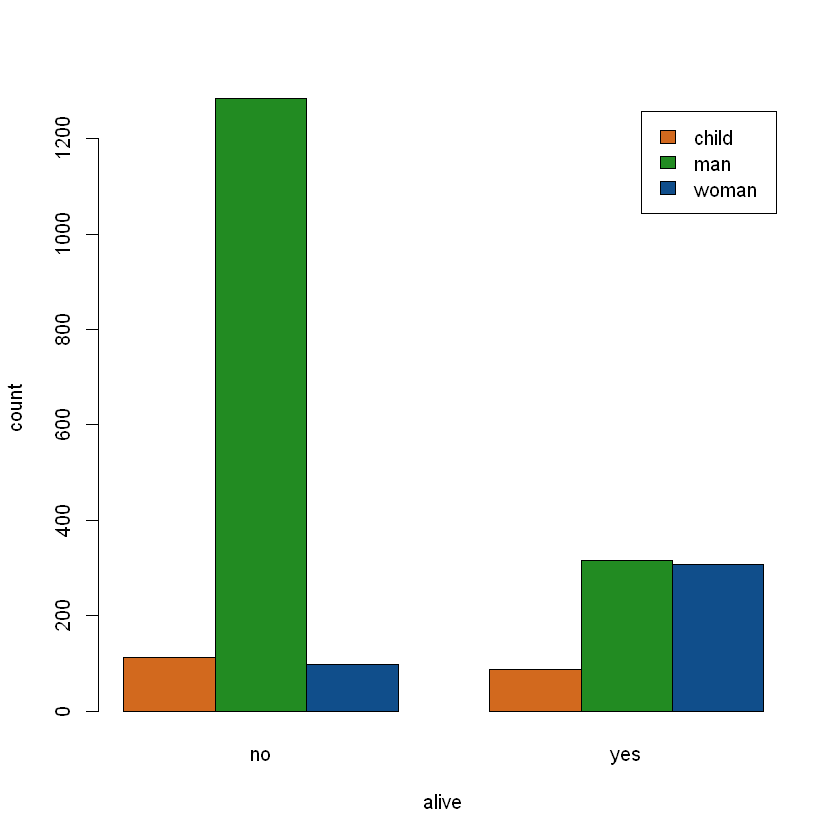

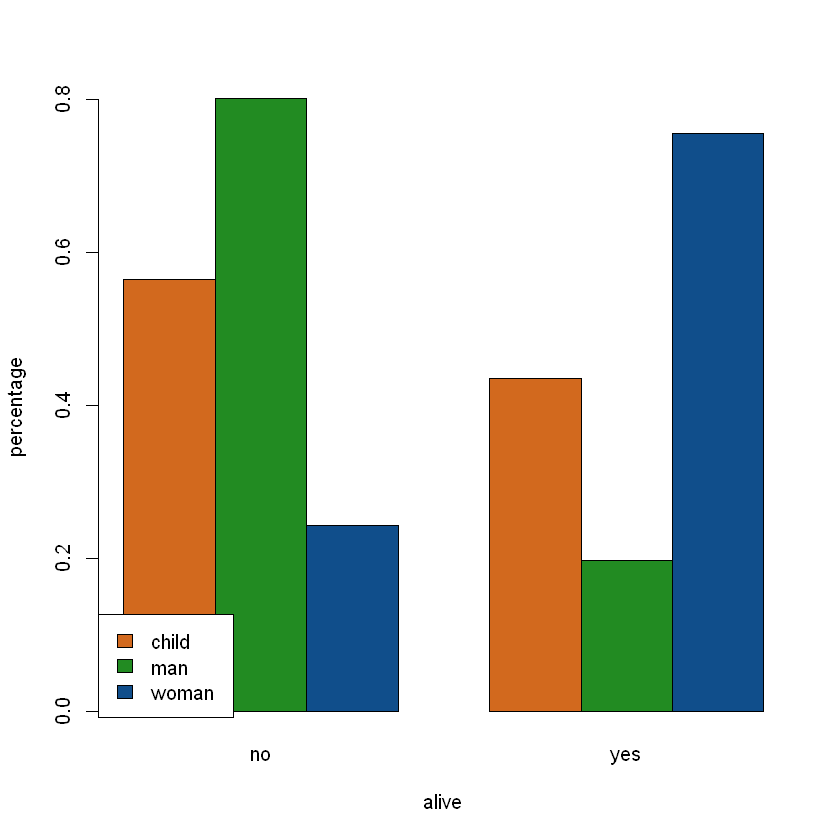

In [11]:
# Form a table with columns class and rows alive
counts <- table(ti$who, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
percentages <- matrix(c(
    length(ti$who[ti$who=="child" & ti$survived=="no"]) / length(ti$who[ti$who=="child"]),
    length(ti$who[ti$who=="man" & ti$survived=="no"]) / length(ti$who[ti$who=="man"]),
    length(ti$who[ti$who=="woman" & ti$survived=="no"]) / length(ti$who[ti$who=="woman"]),
    length(ti$who[ti$who=="child" & ti$survived=="yes"]) / length(ti$who[ti$who=="child"]),
    length(ti$who[ti$who=="man" & ti$survived=="yes"]) / length(ti$who[ti$who=="man"]),
    length(ti$who[ti$who=="woman" & ti$survived=="yes"]) / length(ti$who[ti$who=="woman"])
), ncol=2)
colnames(percentages) <- c("no", "yes")
rownames(percentages) <- c("child", "man", "woman")
percentages <- as.table(percentages)
barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    beside=TRUE, xlab="alive", ylab="percentage"
)
legend("bottomleft", legend=rownames(percentages), fill=c("chocolate", "forestgreen", "dodgerblue4"))


Frauen haben die höchste Überlebensrate, somit ist die Vermutung, dass diese zuerst bei der Rettung berücksichtigt wurden, ziemlich nahe liegend. Für Kinder wird dies wahrscheinlich auch zutreffen, jedoch sind Kinder, vorallem Kleinkinder, auf die Hilfe anderer angewiesen, weil sie z.B. nicht schwimmen können, was ihre Überlebensrate drastisch reduziert.

### 5. Erkläre, wo sich Anzeichen für Simpson's Paradoxon finden lassen.

Betrachtet man die Überlebensrate der verschiedenen Klassen und der Crew gesondert an, erkennt man, dass die Überlebensrate der dritten Passagier-Klasse nur leicht über der der Crew ist.

         alive
1st  0.6203704
2nd  0.4154930
3rd  0.2552891
crew 0.2370787

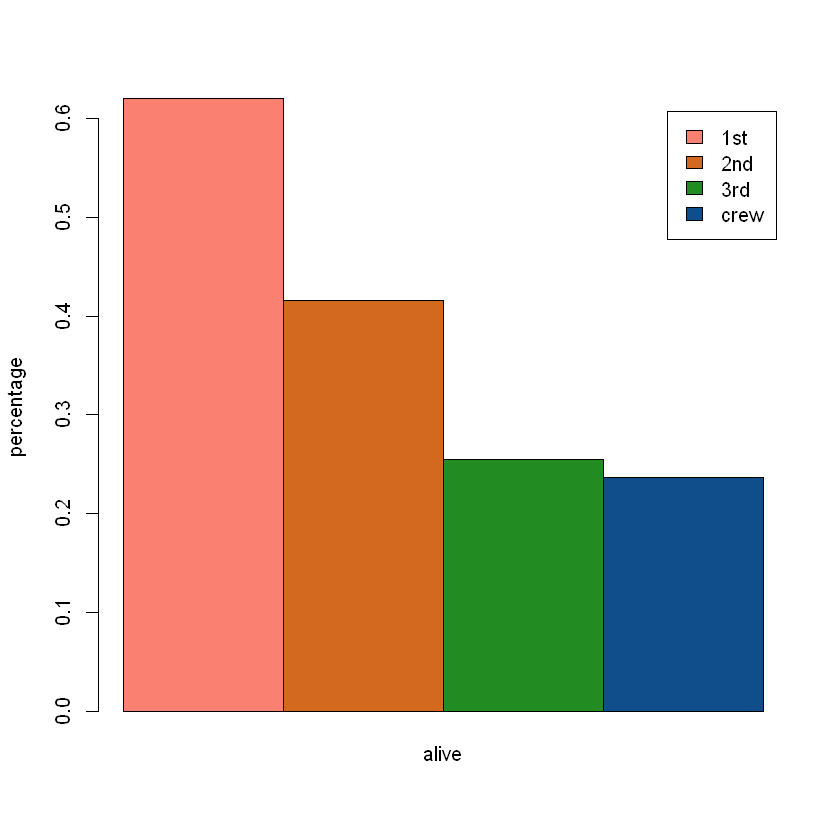

In [12]:
percentages <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="1st"]) /
                   length(ti$survived[ti$class=="1st"]),
    length(ti$survived[ti$survived=="yes" & ti$class=="2nd"]) /
                   length(ti$survived[ti$class=="2nd"]),
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd"]) /
                   length(ti$survived[ti$class=="3rd"]),
    length(ti$survived[ti$survived=="yes" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
                   length(ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])  
), ncol=1)
rownames(percentages) <- c("1st", "2nd", "3rd", "crew")
colnames(percentages) <- c("alive")

percentages <- as.table(percentages)
percentages

barplot(percentages, col=c("salmon", "chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(percentages), beside=TRUE, ylab="percentage"
)

Wenn man jedoch die Überlebensrate der dritten Klasse und Crew auf Geschlecht aufteilt, fällt einem auf, dass in beiden Fällen die Crew auf einmal die besseren Überlebensrate besitzt.

                alive
Third Class 0.1521298
Crew        0.2202999

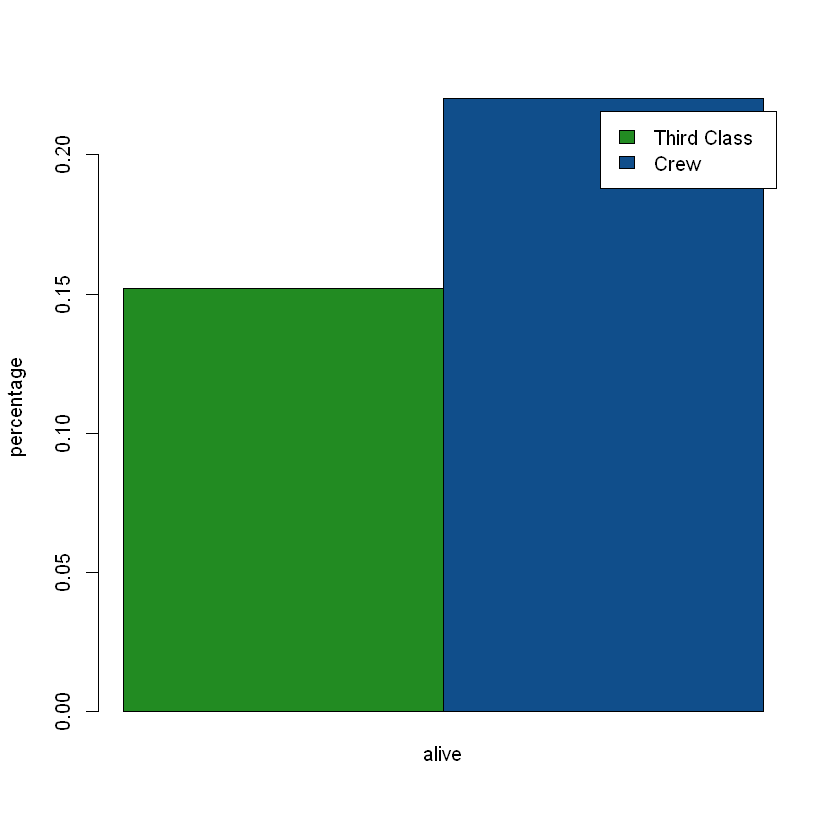

In [13]:
male <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="male"]) /
        length(ti$survived[ti$gender=="male" & ti$class=="3rd"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
        length(ti$survived[ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))])
))
rownames(male) <- c("Third Class", "Crew")
colnames(male) <- c("alive")
male <- as.table(male)
male

barplot(male, col=c("forestgreen", "dodgerblue4"),
    legend = rownames(male), beside=TRUE, ylab="percentage"
)

                alive
Third Class 0.4907407
Crew        0.8695652

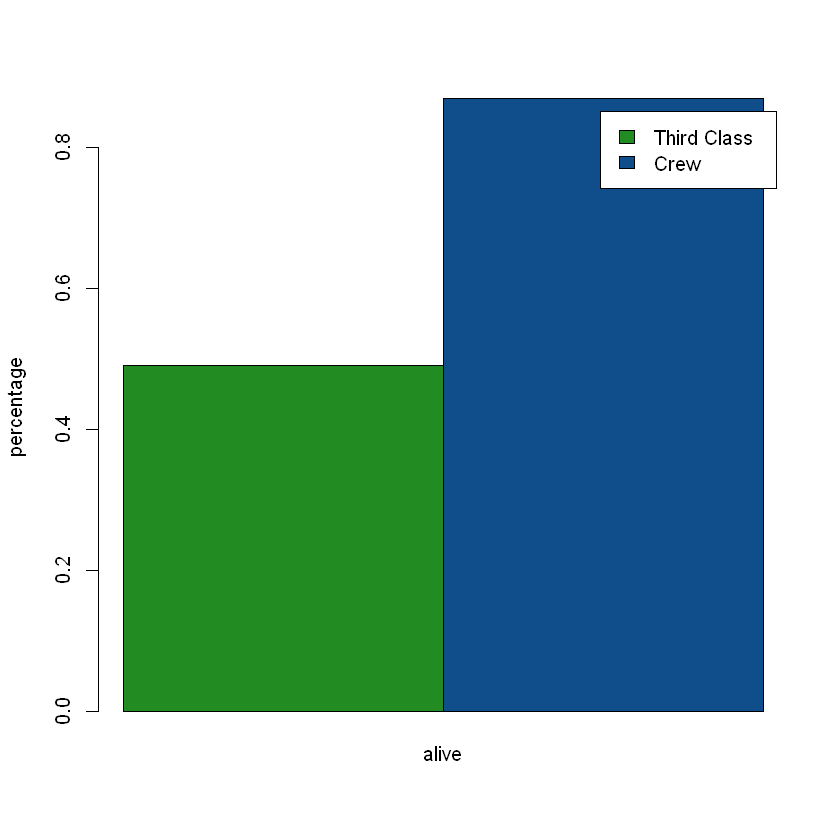

In [14]:
female <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="female"]) /
        length(ti$survived[ti$gender=="female" & ti$class=="3rd"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))]) /
        length(ti$survived[ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))])
))
rownames(female) <- c("Third Class", "Crew")
colnames(female) <- c("alive")
female <- as.table(female)
female

barplot(female, col=c("forestgreen", "dodgerblue4"),
    legend = rownames(female), beside=TRUE, ylab="percentage"
)

In [15]:
full <- matrix(c(
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="male"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))]),
    length(ti$survived[ti$survived=="no" & ti$class=="3rd" & ti$gender=="male"]),
    length(ti$survived[ti$survived=="no" & ti$gender=="male" & (grepl("crew", ti$class) | grepl("staff", ti$class))]),
    length(ti$survived[ti$survived=="yes" & ti$class=="3rd" & ti$gender=="female"]),
    length(ti$survived[ti$survived=="yes" & ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))]),
    length(ti$survived[ti$survived=="no" & ti$class=="3rd" & ti$gender=="female"]),
    length(ti$survived[ti$survived=="no" & ti$gender=="female" & (grepl("crew", ti$class) | grepl("staff", ti$class))])
), ncol=4)
rownames(full) <- c("Third Class", "Crew")
colnames(full) <- c("Male Survived", "Male Died", "Female Survived", "Female Died")
full <- as.table(full)
full
 

            Male Survived Male Died Female Survived Female Died
Third Class            75       418             106         110
Crew                  191       676              20           3

Man sieht, dass es absolut mehr Männer in der Crew gab als in der dritten Klasse. Umgekehrt verhält sich dies bei den Frauen. 

Da Männer allgemein eine schlechtere Überlebensrate als Frauen hatten und die Crew hauptächlich aus Männer bestand, ergab sich der Eindruck, dass die Crew eine schlechtere Überlebensrate als die Passagiere der dritten Klasse hatte. 

Vergleicht man die Daten auf Männer und Frauen aufgeteilt, so erhält man ein anderes Bild.
Dieses Paradoxon, bei dem die Wahrscheinlichkeit verschieden ausfällt, je nachdem man die Werte gruppiert oder nicht betrachtet, nennt man Simpson-Paradoxon. {% cite simpson %}


### 6. Lade den Datensatz 'state.x77' in R. Beschreibe die Daten anhand der internen Hilfe.

Der interne Datensatz `state.x77` besitzt eine Dokumentation.

In [16]:
?state.x77

state {datasets},R Documentation


Nachfolgend werden einige Werte aus dem Datensatz angezeigt.

In [17]:
# Combine Data to one table, used later for operations
# Source: https://stackoverflow.com/a/46416845
mystate <- as.data.frame(state.x77)
# head(mystate)
head(state.x77[,'Population'])
# Alternative call: head(mystate$Population)
head(state.x77[,'Income'])
head(state.x77[,'Illiteracy'])
head(state.x77[,'Life Exp'])
head(state.x77[,'Murder'])

Alabama     Alaska    Arizona   Arkansas California   Colorado 
      3615        365       2212       2110      21198       2541

Alabama     Alaska    Arizona   Arkansas California   Colorado 
      3624       6315       4530       3378       5114       4884

Alabama     Alaska    Arizona   Arkansas California   Colorado 
       2.1        1.5        1.8        1.9        1.1        0.7

Alabama     Alaska    Arizona   Arkansas California   Colorado 
     69.05      69.31      70.55      70.66      71.71      72.06

Alabama     Alaska    Arizona   Arkansas California   Colorado 
      15.1       11.3        7.8       10.1       10.3        6.8

Was kann man aus den Daten schließen? Es handelt sich um rationale und numerische Werte. 

Was mir aber aufgefallen ist, dass die Werte für die Bevölkerung nicht wirklich definiert sind. Es lebten sicher nicht 3615 Personen im Staat Alabama im Jahr 1977, auch kann ich mir nicht vorstellen, dass die Bevölkerung um diese Personenanzahl gestiegen ist. Beim Vergleich mit den Daten die Google mit der Suchanfrage `alabama population 1977` zurückgab, habe ich den Schluss gezogen, dass die Bevölkerungszahl durch 1000 die Bevölkerung in Millionen angibt.

In [18]:
mystate$PopulationMil <- mystate$Population / 1000
head(mystate)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,PopulationMil
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,3.615
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,0.365
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,2.212
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,2.110
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,21.198
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,2.541


### 7. Ermittle mithilfe geeigneter Schätzer für die Lage und Streuung der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder.

Nachfolgend sind die arithemtischen Mittel, Mediane und die Interquartilsabstände (IQR nach *inerquartile range*) der Variablen angeführt.

Anmerkung: Ein Quartilsabstand gibt die Breite des Intervalls an, in dem die mittleren 50% der Stichprobeelemente liegen. {% cite wiki:iqr %}

In [19]:
full <- matrix(c(
    mean(state.x77[,'Population']),
    mean(state.x77[,'Income']),
    mean(state.x77[,'Illiteracy']),
    mean(state.x77[,'Life Exp']),
    mean(state.x77[,'Murder']),
    median(state.x77[,'Population']),
    median(state.x77[,'Income']),
    median(state.x77[,'Illiteracy']),
    median(state.x77[,'Life Exp']),
    median(state.x77[,'Murder']),
    IQR(state.x77[,'Population']),
    IQR(state.x77[,'Income']),
    IQR(state.x77[,'Illiteracy']),
    IQR(state.x77[,'Life Exp']),
    IQR(state.x77[,'Murder'])
), ncol=3)
rownames(full) <- c("Population", "Income", "Illiteracy", "Life Exp", "Murder")
colnames(full) <- c("Mean", "Median", "IQR")
full <- as.table(full)
full

                Mean    Median       IQR
Population 4246.4200 2838.5000 3889.0000
Income     4435.8000 4519.0000  820.7500
Illiteracy    1.1700    0.9500    0.9500
Life Exp     70.8786   70.6750    1.7750
Murder        7.3780    6.8500    6.3250

## Die Punkte 8, 9 und 10 werden gemeinsam in einem Absatz bearbeitet.

#### 8. Stelle die Daten der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder in geeigneter Weise graphisch dar. Verwende dafür wenigstens 2 unterschiedliche graphische Darstellungen.

#### 9. Begründe anhand der graphischen Darstellung, ob es sich symmetrische oder schiefe Datenverteilungen handelt. Begründe anhand der graphischen Darstellungen, ob schwere oder leichte Ränder vorliegen (und auf welcher Seite).

#### 10. Bestimme anhand graphischen Darstellungen aus Punkt 8. und der Erkenntnisse aus 9., ob Ausreißer vorliegen und welche Punkte dies sind.

### Population

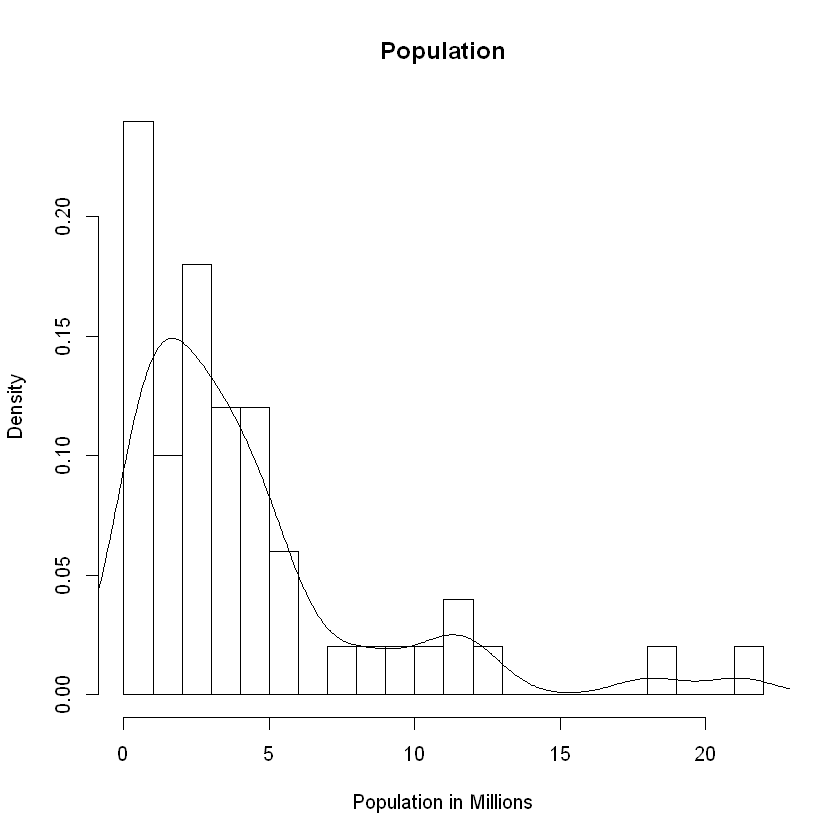

In [20]:
hist(mystate$PopulationMil, freq=FALSE, breaks=20, xlab="Population in Millions", main="Population")
dens <- density(mystate$PopulationMil)
lines(dens)

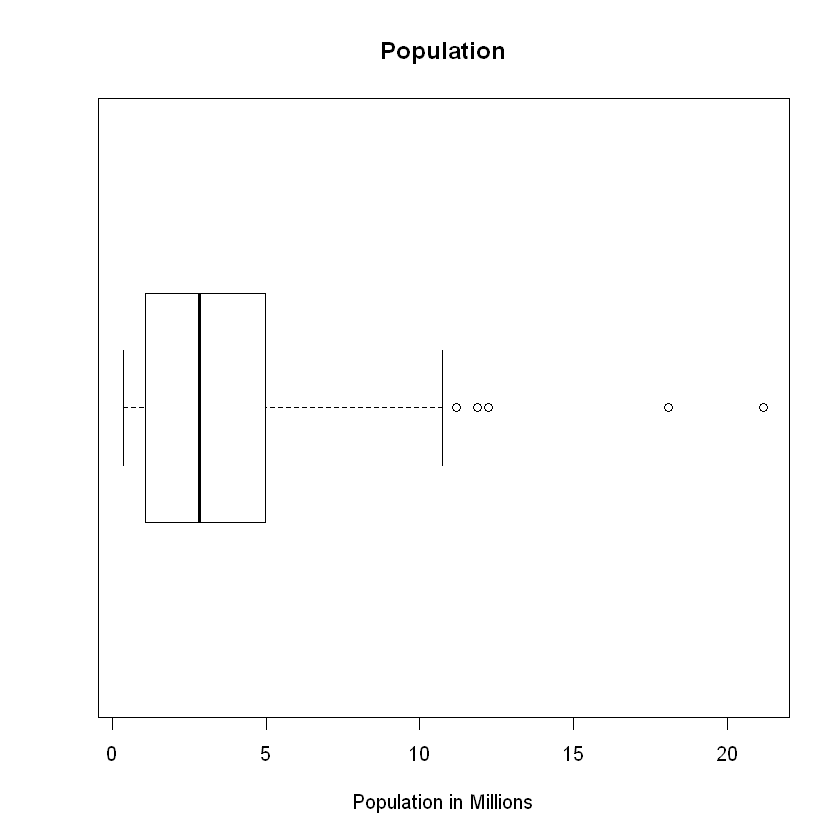

In [21]:
boxplot(mystate$PopulationMil, horizontal=TRUE, xlab="Population in Millions", main="Population")

Mithilfe der graphischen Darstellungen kann man sagen, dass die Daten rechtsschief verteilt sind, da der Median kleiner als das arithmetisches Mittel ist. Außerdem ist die Dichtefunktion flacher auf der rechten Seite ist und im Boxplot ist die Box links zwischen den Whiskers. {% cite stat_schiefe %}

Als Ausreißer werden meist Werte definiert, die über den oberen Quartil in Addition mit dem Interquartilsabstandes mal 1,5 sind. Im Falle der Bevölkerung bekommen wir fünf Bundesstaten, die auch im Boxplot erkennbar sind.

In [22]:
quantiles <- quantile(mystate$PopulationMil, probs = c(0.25, 0.75))
lower <- quantiles[[1]]
upper <- quantiles[[2]]
out <- upper + (upper-lower)*1.5
# Output with matrix: state.x77[state.x77[,'Population'] > out,]
# Output with own table:
outliers <- mystate[mystate$PopulationMil > out,]
outliers[order(outliers$PopulationMil),]

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,PopulationMil
Illinois,11197,5107,0.9,70.14,10.3,52.6,127,55748,11.197
Pennsylvania,11860,4449,1.0,70.43,6.1,50.2,126,44966,11.860
Texas,12237,4188,2.2,70.90,12.2,47.4,35,262134,12.237
New York,18076,4903,1.4,70.55,10.9,52.7,82,47831,18.076
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,21.198


### Income

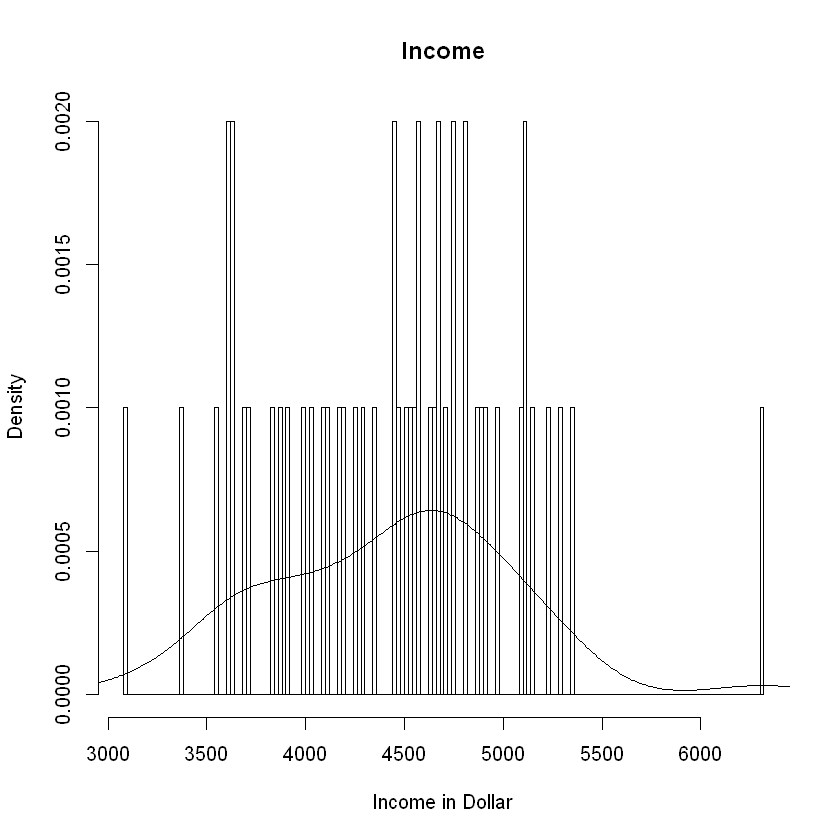

In [23]:
hist(mystate$Income, freq=FALSE, breaks=150, xlab="Income in Dollar", main="Income")
dens <- density(mystate$Income)
lines(dens)

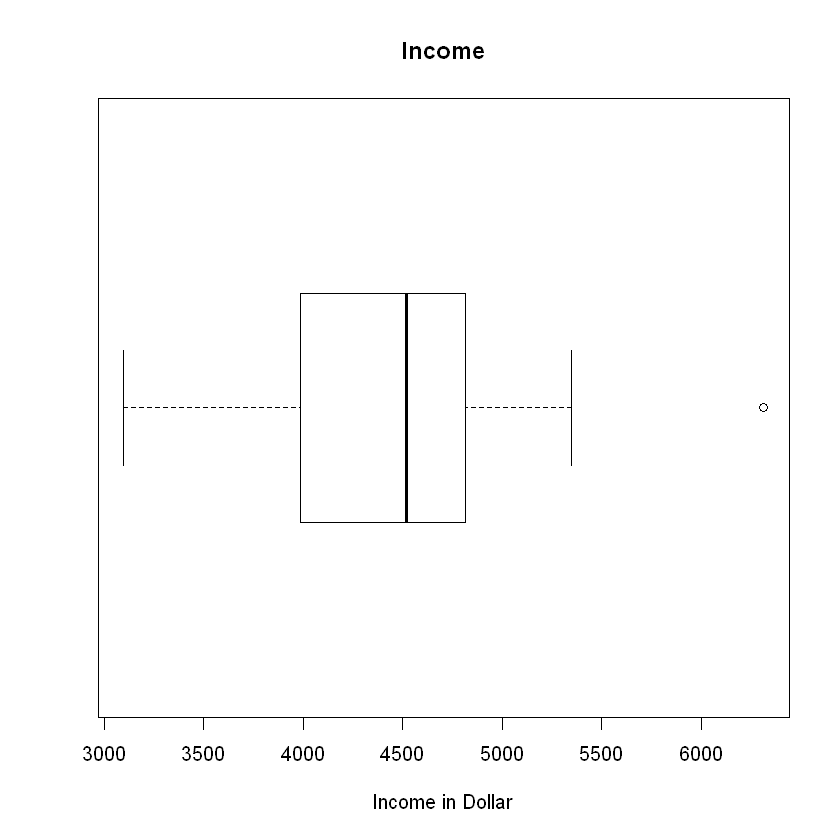

In [42]:
boxplot(mystate$Income, horizontal=TRUE, xlab="Income in Dollar", main="Income")

Mithilfe der graphischen Darstellungen kann man sagen, dass die Daten eher linksschief verteilt sind, da der Median größer als das arithmetisches Mittel ist. Außerdem ist die Dichtefunktion flacher auf der linken Seite ist und im Boxplot ist die Box eher rechts zwischen den Whiskers.

Beim Einkommen ist einzig der Bundesstaat Alaska ein Ausreißer.

In [33]:
quantiles <- quantile(mystate$Income, probs = c(0.25, 0.75))
lower <- quantiles[[1]]
upper <- quantiles[[2]]
out <- upper + (upper-lower)*1.5
outliers <- mystate[mystate$Income > out,]
outliers[order(outliers$Income),]

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,PopulationMil
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,0.365


### Illiteracy

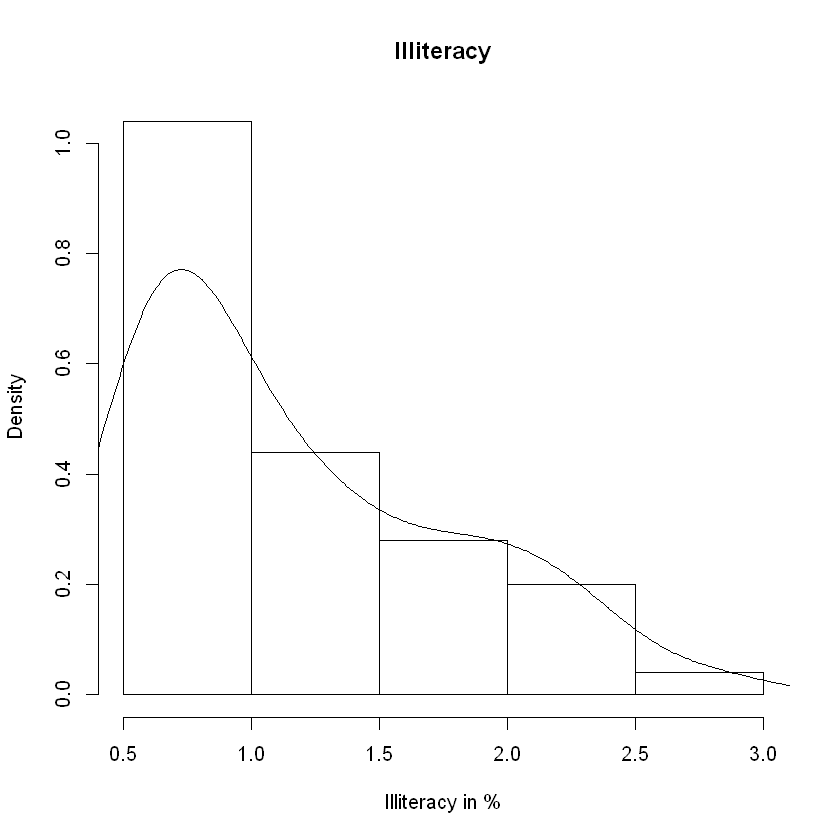

In [25]:
hist(mystate$Illiteracy, freq=FALSE, xlab="Illiteracy in %", main="Illiteracy")
dens <- density(mystate$Illiteracy)
lines(dens)

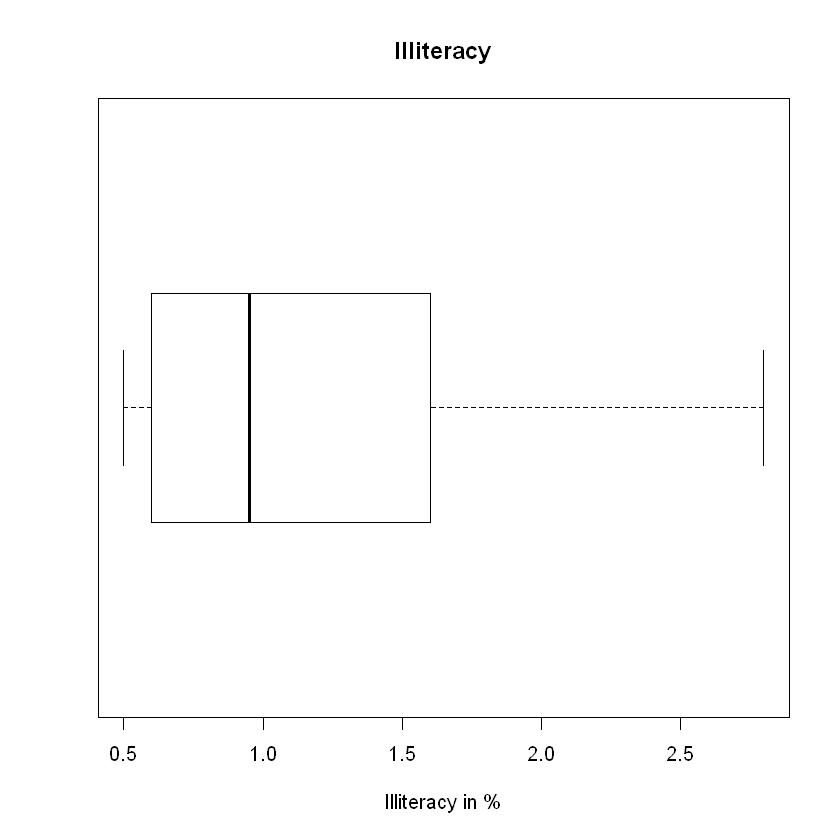

In [43]:
boxplot(mystate$Illiteracy, horizontal=TRUE, xlab="Illiteracy in %", main="Illiteracy")

Mithilfe der graphischen Darstellungen kann man sagen, dass die Daten rechtsschief verteilt sind, da der Median kleiner als das arithmetisches Mittel ist. Außerdem ist die Dichtefunktion flacher auf der rechten Seite ist und im Boxplot ist die Box links zwischen den Whiskers.

Die Daten haben keine Ausreißer.

In [37]:
quantiles <- quantile(mystate$Illiteracy, probs = c(0.25, 0.75))
lower <- quantiles[[1]]
upper <- quantiles[[2]]
out <- upper + (upper-lower)*1.5
outliers <- mystate[mystate$Illiteracy > out,]
outliers[order(outliers$Illiteracy),]

Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,PopulationMil


### Life Expectancy

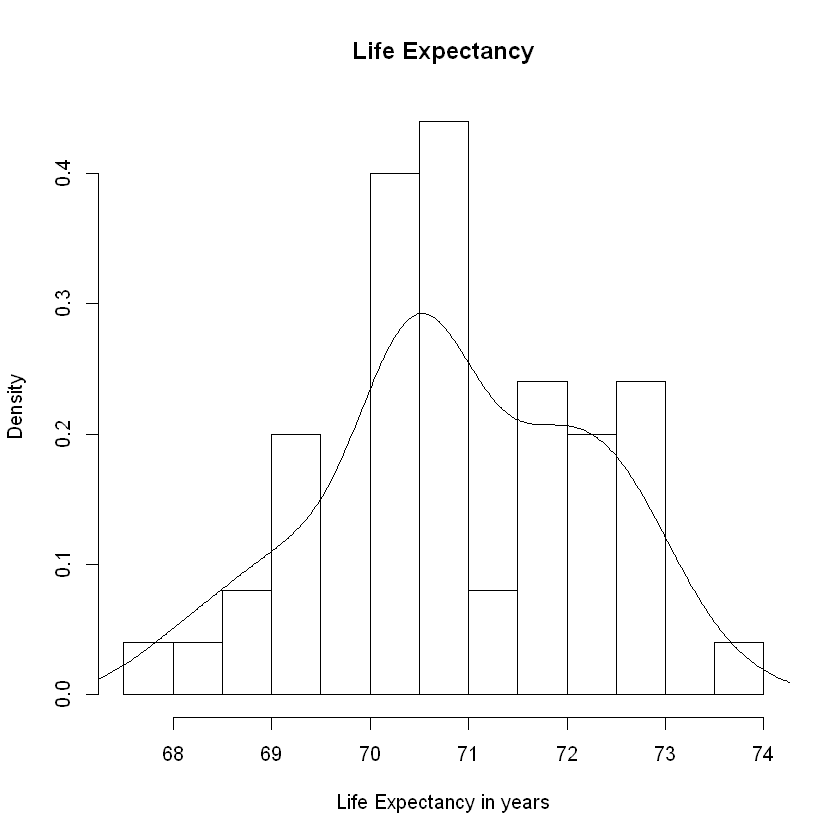

In [27]:
hist(mystate$"Life Exp", freq=FALSE, breaks=15, xlab="Life Expectancy in years", main="Life Expectancy")
dens <- density(mystate$"Life Exp")
lines(dens)

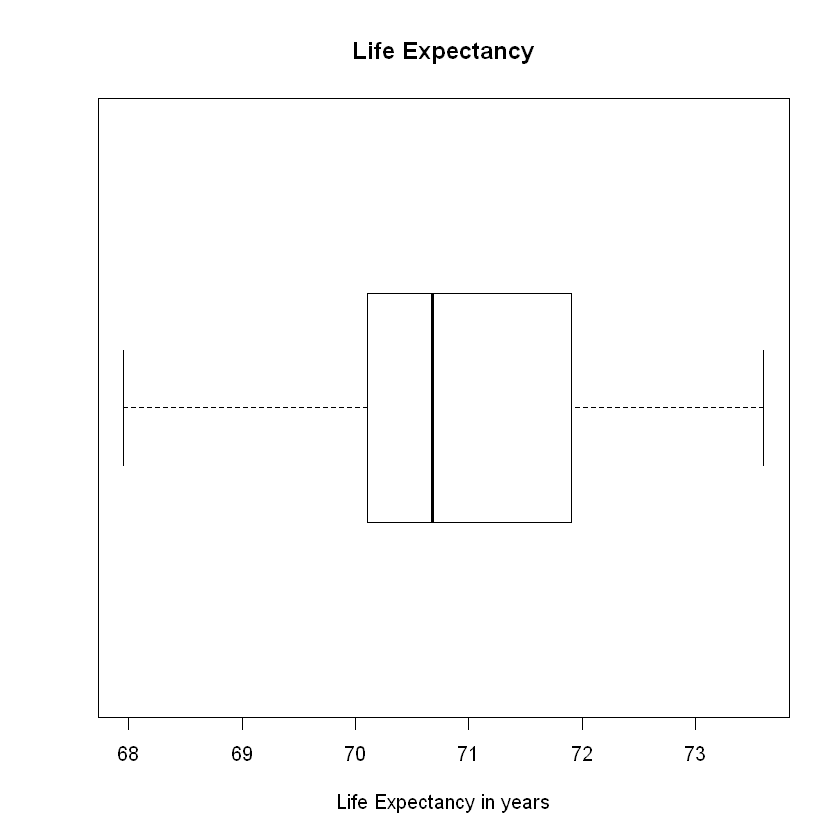

In [45]:
boxplot(mystate$"Life Exp", horizontal=TRUE, xlab="Life Expectancy in years", main="Life Expectancy")

Aus den Daten kann man sagen, dass die Funktion fast symmetrisch ist, da Median und Mittel fast gleich sind. Wenn man ganz genau ist, kann man sagen, dass die Funktion leicht rechtsschief ist, da der Median kleiner als das arithmetische Mittel ist. Mithilfe der graphischen Darstellung ist dies aber schwer abzulesen. Beim Boxplot muss man wirklich auf den Median achten und nicht auf die gesamte Box.

Die Daten haben keine Ausreißer.

In [39]:
quantiles <- quantile(mystate$"Life Exp", probs = c(0.25, 0.75))
lower <- quantiles[[1]]
upper <- quantiles[[2]]
out <- upper + (upper-lower)*1.5
outliers <- mystate[mystate$"Life Exp" > out,]
outliers[order(outliers$"Life Exp"),]

Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,PopulationMil


### Murder

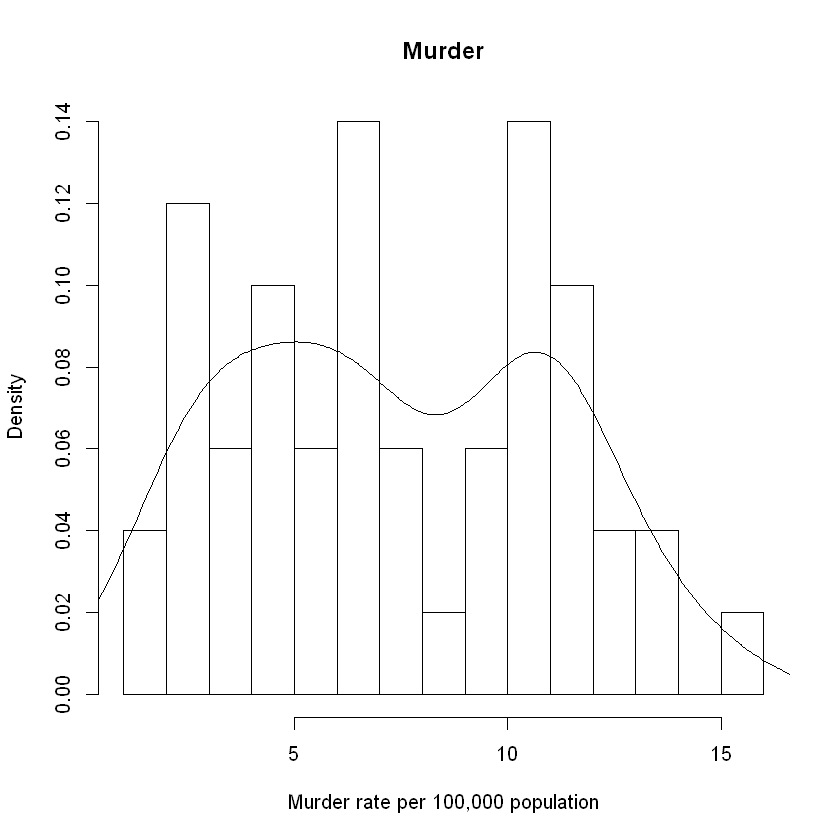

In [29]:
hist(mystate$Murder, freq=FALSE, breaks=10, xlab="Murder rate per 100,000 population", main="Murder")
dens <- density(mystate$Murder)
lines(dens)

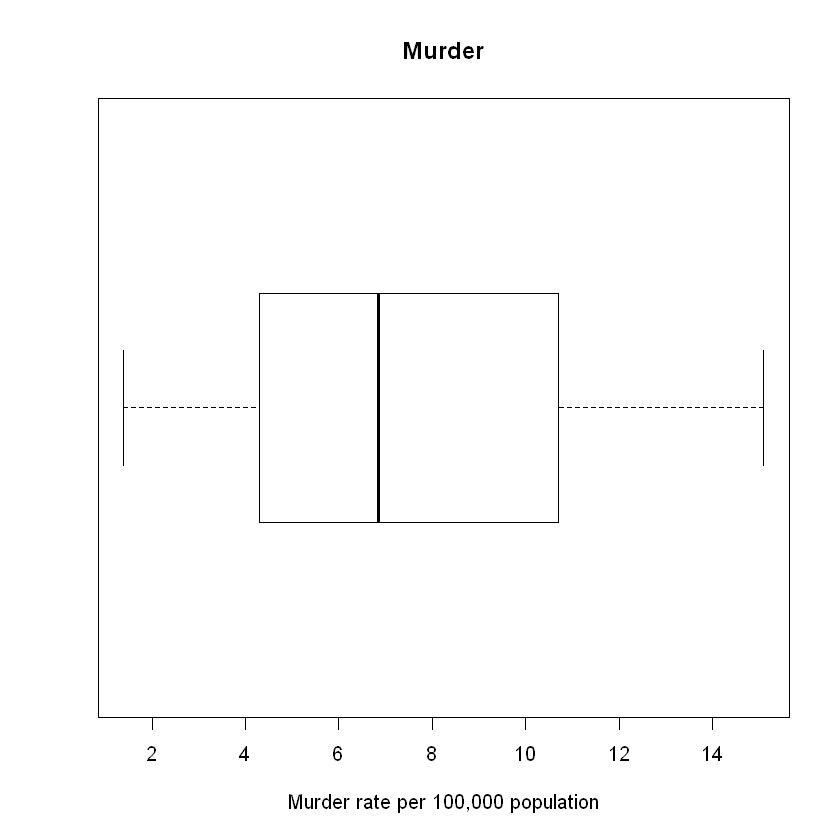

In [46]:
boxplot(mystate$Murder, horizontal=TRUE, xlab="Murder rate per 100,000 population", main="Murder")

Mithilfe der graphischen Darstellungen kann man sagen, dass die Daten rechtsschief verteilt sind, da der Median kleiner als das arithmetisches Mittel ist. Außerdem ist die Dichtefunktion flacher auf der rechten Seite ist und im Boxplot ist die Box links zwischen den Whiskers.

Die Daten haben keine Ausreißer.

In [41]:
quantiles <- quantile(mystate$Murder, probs = c(0.25, 0.75))
lower <- quantiles[[1]]
upper <- quantiles[[2]]
out <- upper + (upper-lower)*1.5
outliers <- mystate[mystate$Murder > out,]
outliers[order(outliers$Murder),]

Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,PopulationMil


{% bibliography --cited %}